# Applied Data Science - Regression

In [1]:
# importing libraries
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from statsmodels.formula.api import ols
import statsmodels.api as sm
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## 01. Data

In [2]:
# California Housing Dataset
housing = datasets.fetch_california_housing(as_frame=True)

# Dataset description
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# Loading data
data = housing.frame

# First 5 instances
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Observations:**
- 20640 non-null observations for each variable. i.e., no missing values
- 9 numeric (float64) columns

In [5]:
# Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


**Observations:**

**MedHouseVal**
- the mean house value, considering all block groups, is ~200,000
- At the most expensive house block the mean house value is ~500,000
- At the least expensive house block the mean house value is ~15,000
- 75% of the mean house values are below ~264,000

**MedInc**
- The mean income, considering all block groups, is 380,000
- The block with the lowest median income 50,000
- The block with the highest median income 1,500,000
- 75% of the median income is below 474,000

**HouseAge**
- the mean house age, considering all block groups, is ~ 28 years of age
- the youngest block has the median age of around 1 year; this might be due to many newborns
- the oldest block has the median age og around 52 years
- 25% of the mean house age are 18 or below
- 50% of the mean house age are 29 or below
- 75% of the mean house age are 37 or below

AveRooms: average number of rooms per household

AveBedrms: average number of bedrooms per household

Population: block group population

AveOccup: average number of household members


## 02. Exploratory Data Analysis

MedInc
Skew:1.65


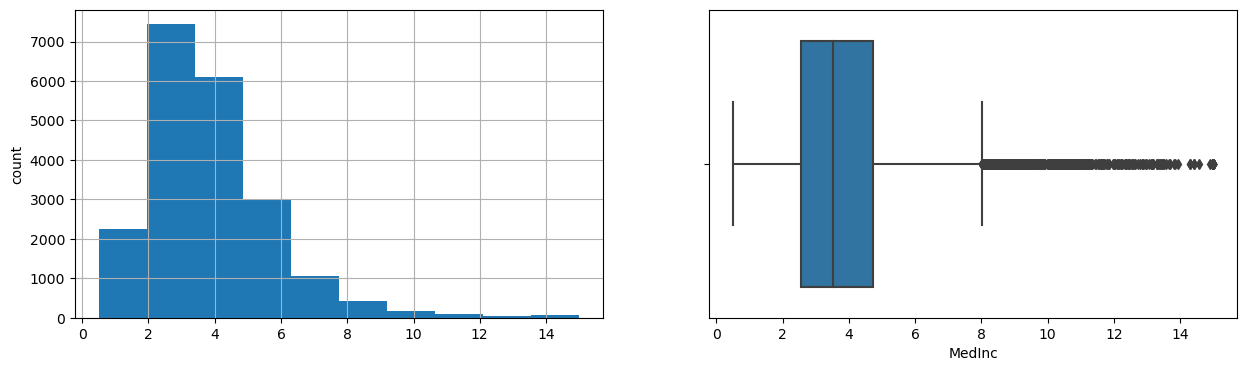

HouseAge
Skew:0.06


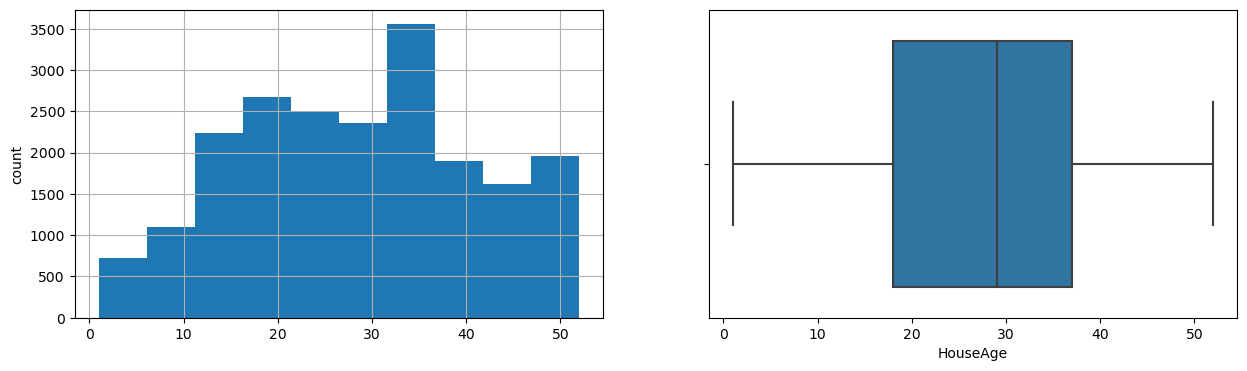

AveRooms
Skew:20.7


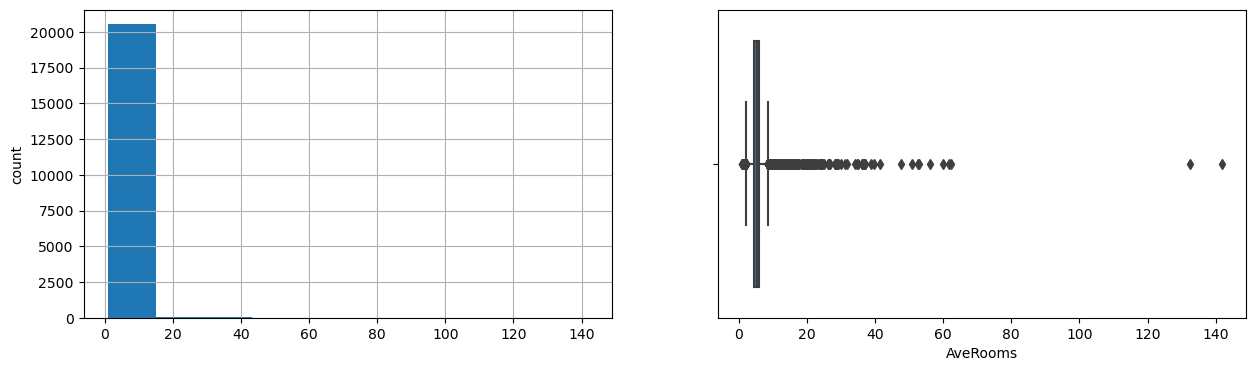

AveBedrms
Skew:31.32


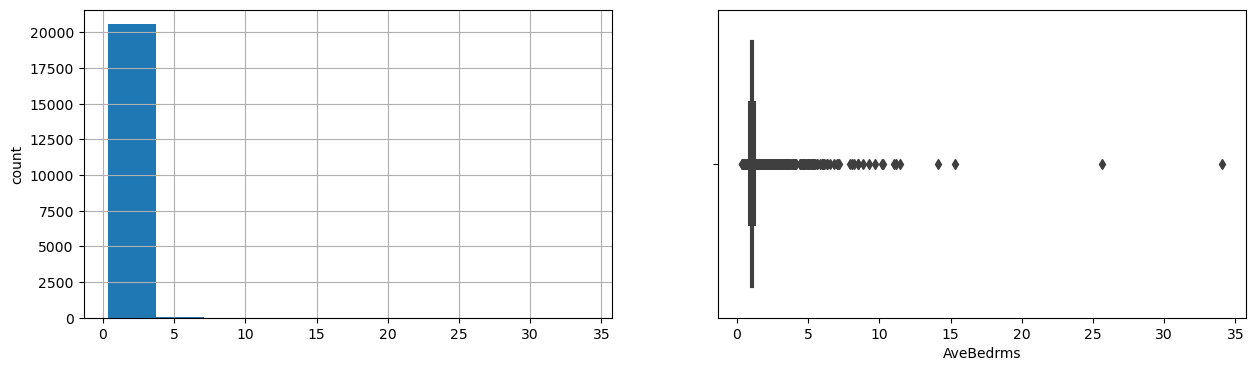

Population
Skew:4.94


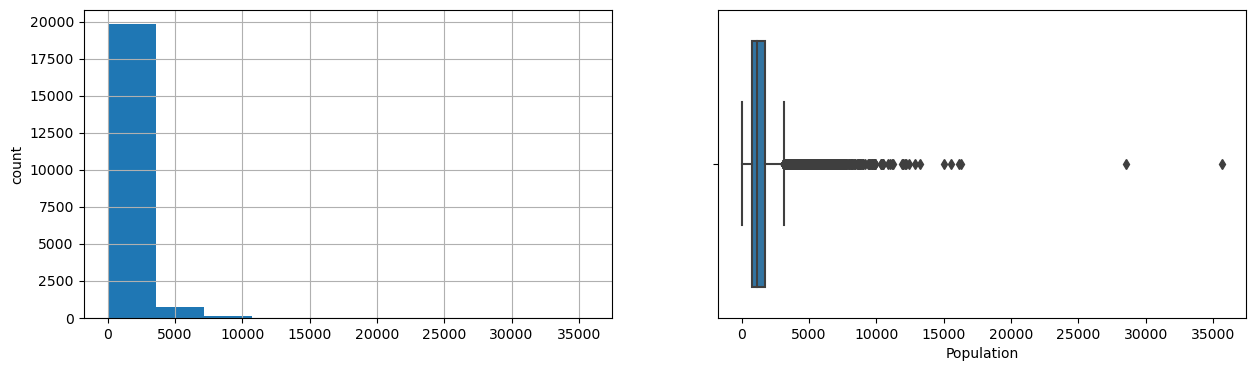

AveOccup
Skew:97.64


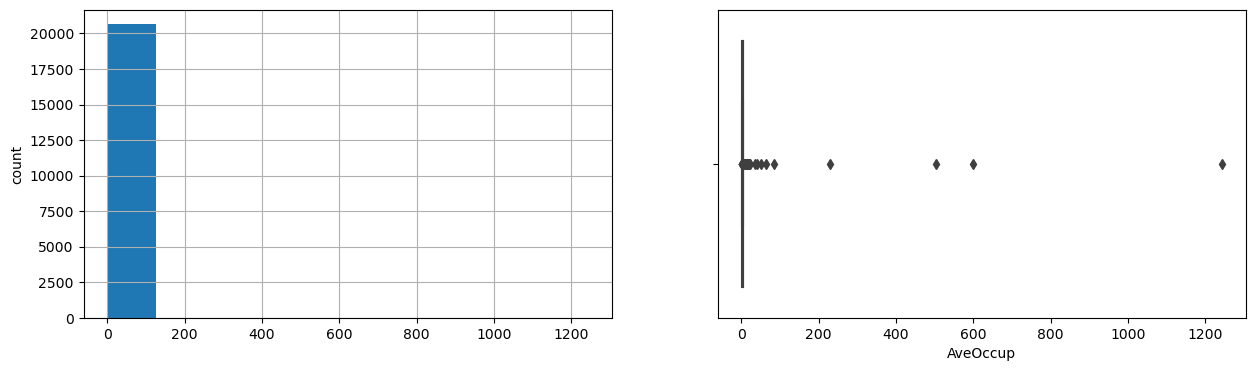

Latitude
Skew:0.47


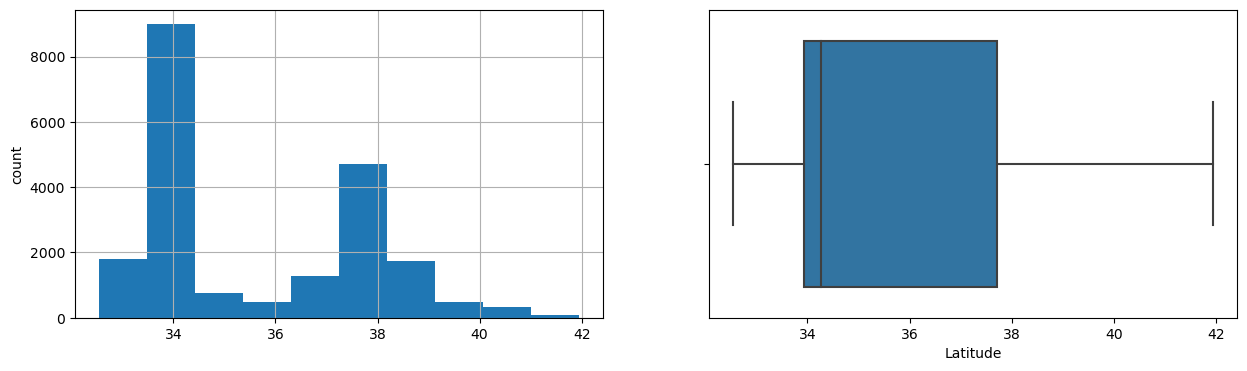

Longitude
Skew:-0.3


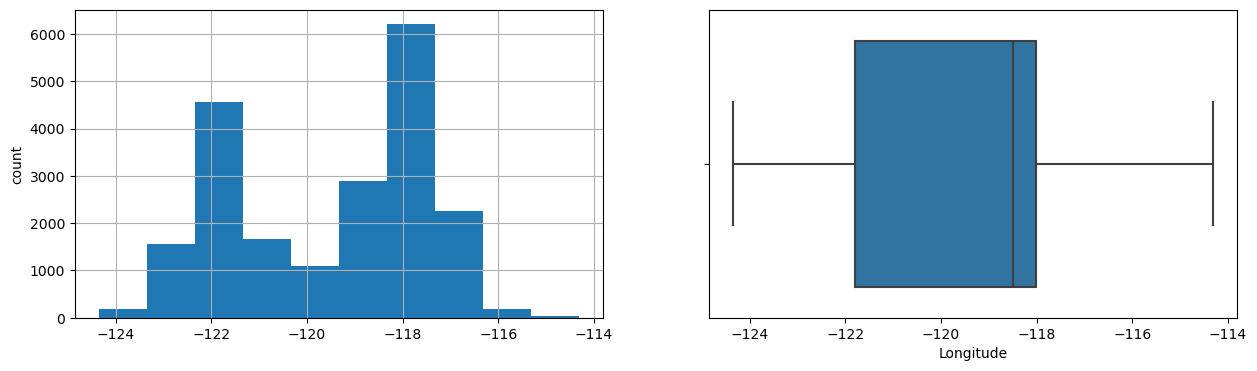

MedHouseVal
Skew:0.98


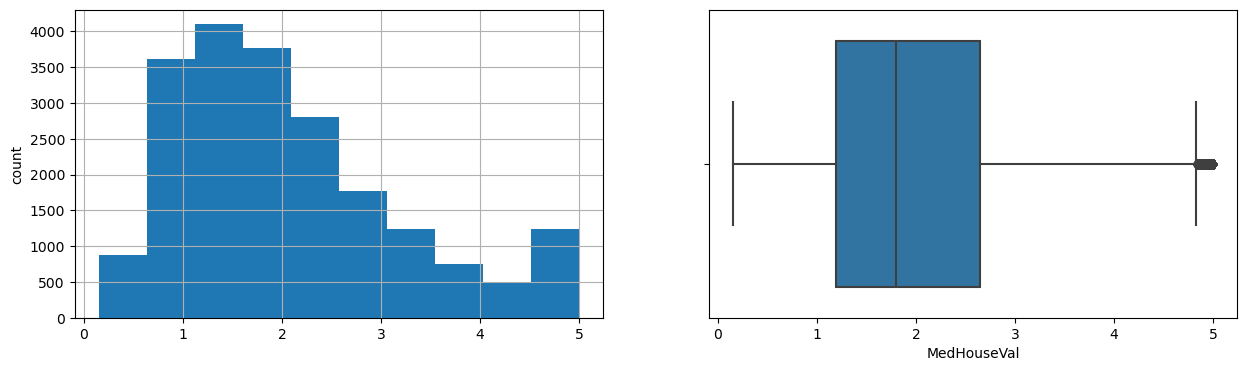

In [6]:
# Univariate Analysis
for col in data.columns:
    
    print(col)
    
    print(f'Skew:{round(data[col].skew(), 2)}')
    
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist()
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x=data[col])
    
    plt.show()

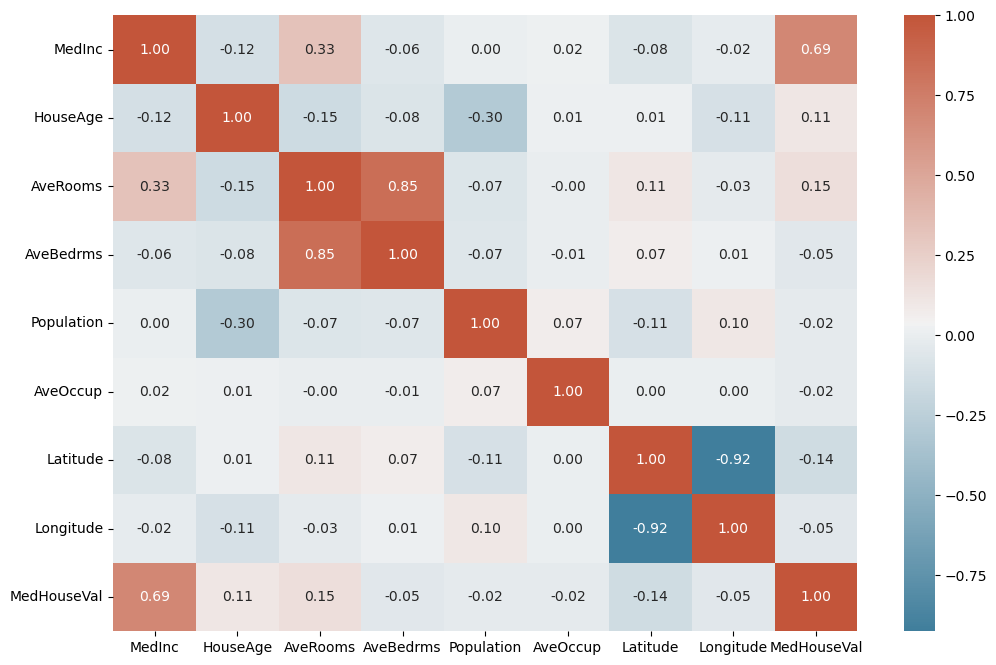

In [7]:
# Bivariate Analysis
plt.figure(figsize=(12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = cmap )

plt.show()

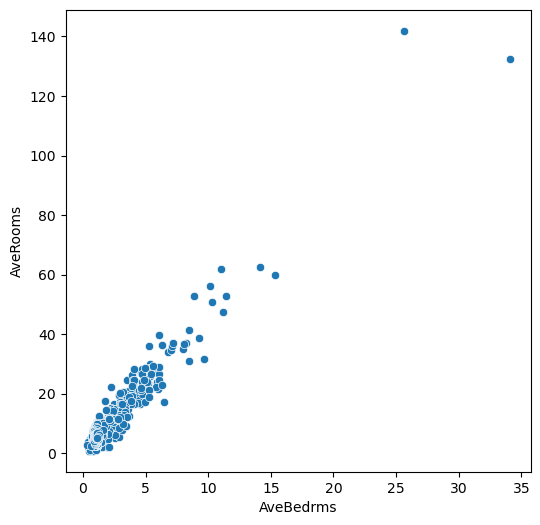

In [8]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AveBedrms', y = 'AveRooms', data = data)

plt.show()

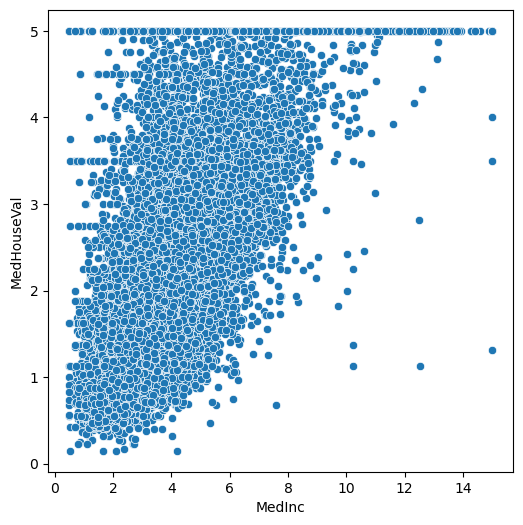

In [9]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'MedInc', y = 'MedHouseVal', data = data)

plt.show()

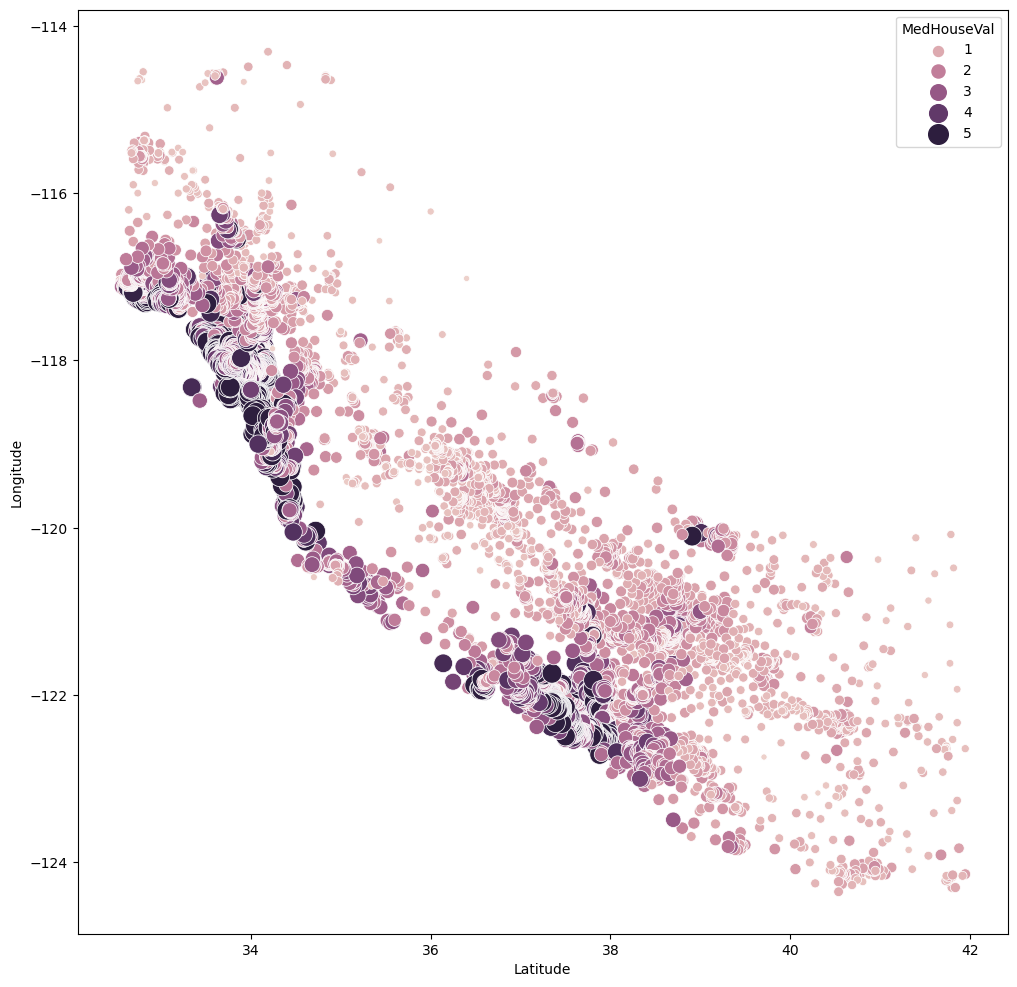

In [10]:
plt.figure(figsize = (12, 12))

sns.scatterplot(x='Latitude', 
                y='Longitude', 
                data=data, 
                hue='MedHouseVal',size='MedHouseVal',sizes=(20, 200))

plt.show()

## 03. Data Processing

In [11]:
from sklearn.neighbors import LocalOutlierFactor

# taking array values
array = data.values

# Outlier Detection
lof = LocalOutlierFactor()
yhat = lof.fit_predict(array)

# Selecting rows that are not outliers
mask = yhat != -1
array = array[mask, :]

# df without outliers
data = pd.DataFrame(array, columns=data.columns)

In [12]:
# log transform
data['MedHouseVal_log'] = np.log(data['MedHouseVal'])

In [13]:
from sklearn.model_selection import train_test_split

# Splitting the data
y = data['MedHouseVal_log']

X = data.drop(columns = {'MedHouseVal', 'MedHouseVal_log'})

In [14]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)


In [15]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              index = X_train.index,
                              columns = X_train.columns)
# Intercep term
X_train_scaled = sm.add_constant(X_train_scaled)

# scaling test set
X_test_scaled = scaler.fit_transform(X_test)

# Intercep term
X_test_scaled = sm.add_constant(X_test_scaled)

## 04. Model

In [16]:
# Create OLS model
model = sm.OLS(y_train, X_train_scaled).fit()

# Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedHouseVal_log   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     3084.
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:13:16   Log-Likelihood:                -5050.6
No. Observations:               14332   AIC:                         1.012e+04
Df Residuals:                   14323   BIC:                         1.019e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9543      0.039     49.593      0.000       1.877       2.032
MedInc         2.9984      0.038     78.584      0.000       2.924       3.073
HouseAge       0.1521      0.013     11.550      0.000       0.126       0.178
AveRooms      -1.7230      0.117    -14.776      0.000      -1.952      -1.494
AveBedrms      3.5869      0.178     20.137      0.000       3.238       3.936
Population     0.1816      0.033      5.473      0.000       0.117       0.247
AveOccup      -4.3308      0.306    -14.132      0.000      -4.931      -3.730
Latitude      -2.6140      0.040    -65.642      0.000      -2.692      -2.536
Longitude     -2.7809      0.044    -62.774      0.000      -2.868      -2.694
==============================================================================
Omnibus:                     1163.241   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6618.358
Skew:                           0.144   Prob(JB):                         0.00
Kurtosis:                       6.317   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for multicolinearity
vif = pd.DataFrame()

vif['feature'] = X_train_scaled.columns

vif['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(len(X_train_scaled.columns))]

print(vif)

      feature         VIF
0       const  187.750263
1      MedInc    2.818140
2    HouseAge    1.276901
3    AveRooms    3.861830
4   AveBedrms    2.387417
5  Population    1.176338
6    AveOccup    1.023532
7    Latitude    9.848123
8   Longitude    9.408438


In [18]:
# Mean of Residuals
residuals = model.resid

print(f"Mean of Residuals: {np.mean(residuals)}")

Mean of Residuals: 8.700826829884007e-16


In [19]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

# Homoscedasticity
homoscedasticity = sms.het_goldfeldquandt(y_train, X_train_scaled)

print(f"F statistic: {homoscedasticity[0]}")
print(f"p-value: {homoscedasticity[1]}")

F statistic: 0.944061730446113
p-value: 0.9925472118842366


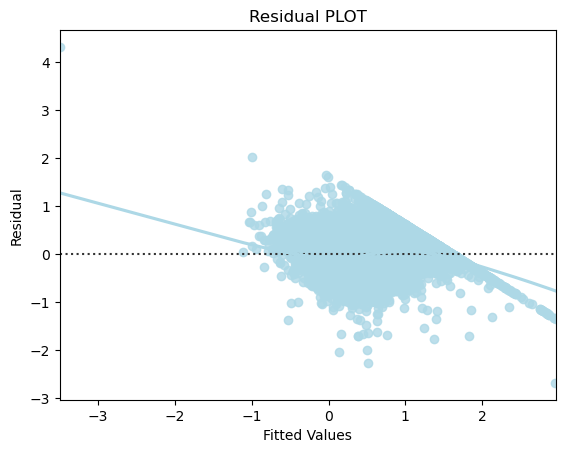

In [25]:
# Linearity of variables

# Predicted values
fitted = model.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

<AxesSubplot: ylabel='Count'>

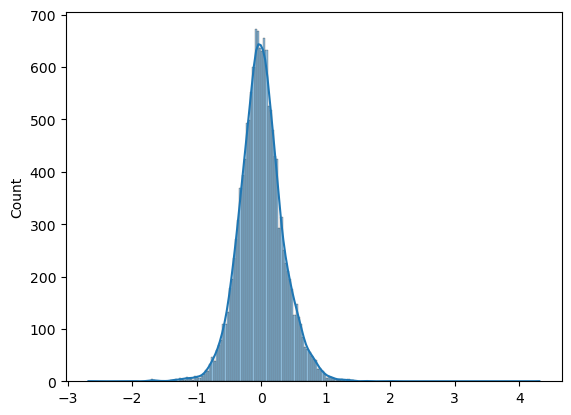

In [21]:
# Normality of error terms
sns.histplot(residuals, kde = True)

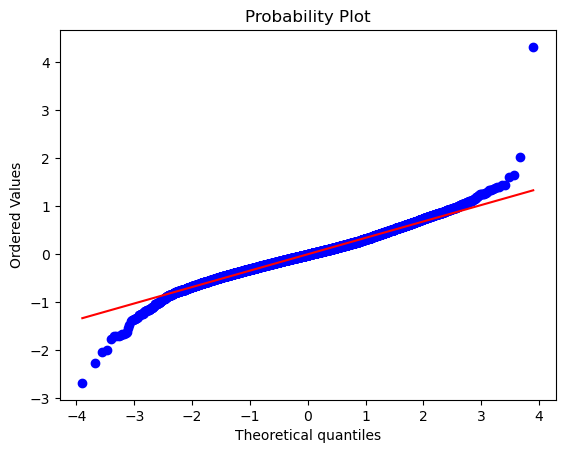

In [22]:
import pylab

import scipy.stats as stats

# Plot q-q plot of residuals
stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

## 05. Testing

In [23]:
y_pred_test = model.predict(X_test_scaled)

y_pred_test_transformed = np.exp(y_pred_test)

y_pred_train = model.predict(X_train_scaled)

y_pred_train_transformed = np.exp(y_pred_train)

In [24]:
from sklearn.metrics import mean_absolute_error

print(f"Train")
print(f"MAE: {mean_absolute_error(y_pred_train_transformed,y_train)}")


print(f"\nTest")
print(f"MAE: {mean_absolute_error(y_pred_test_transformed,y_test)}")
      

Train
MAE: 1.4050105034783926

Test
MAE: 0.6835265090389372
